# Imports

In [2]:
import os
import errno
from importlib import reload
import pickle 
from pprint import pprint
from itertools import product
from glob import glob
from os.path import basename, splitext, split

In [3]:
import itertools
from numba import jit

/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
# just so saved plots aren't also shown
matplotlib.use('Agg')
%matplotlib inline
import seaborn as sns

import pymc3 as pm
import theano as T
import theano.tensor as tt
import arviz as az
import xarray as xr
from json import dump
from os.path import exists, join

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/arviz/data/base.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [5]:
from functions.helper_functions import save_trace, load_trace
from functions.data_functions import get_and_clean_data_exp2

In [6]:
from functions.argstrengths import (
    calculate_nonparametric_argstrength, 
    theano_calculate_pragmatic_argstrength, 
    theano_calculate_pragmatic_speaker, 
    calculate_argumentative_strength, 
    calculate_maximin_argstrength
)

from functions.helper_functions import (
    verify, 
    normalize, 
    theano_calculate_pragmatic_speaker,
    get_costs,
    calculate_pragmatic_speaker,
    theano_normalize, 
    theano_softmax
)

In [7]:
from functions.models_variablearray import (
    factory_model_base,
    factory_model_lr_argstrength,
    factory_model_maximin_argstrength,
    factory_model_prag_argstrength,
    factory_model_nonparametric_argstrength,
)

In [8]:
# packages versions
print(
    '\n'.join(
        f'{m.__name__}=={m.__version__}' 
        for m in globals().values() 
        if getattr(m, '__version__', None)
    )
)

pandas==2.2.3
numpy==1.23.5
matplotlib==3.8.4
seaborn==0.13.2
pymc3==3.11.4
theano==1.1.2
arviz==0.12.1
xarray==2023.7.0


In [9]:
folder_exp2_traces = '../../arglang_model_fitting/experiment2_traces'
# where to store the argstrengths, since some of them take a while to compute
# (namely, the ones with full state space)
path_to_argstrengths_folder = './argstrengths/'
folder_exp2_cleaned_data = '../data/data_experiment2/'

In [10]:
folder_exp1_data = '../data/data_experiment1/data.csv'
folder_exp2_data = '../data/data_experiment2/data.csv'

In [11]:
exp1and2_data = get_and_clean_data_exp2(
    pathdata_firstexp=folder_exp1_data,
    pathdata=folder_exp2_data
)
_, data, list_possible_observations, possible_utterances = exp1and2_data

0  were excluded because incompletely recorded
14  of the participants were excluded as they gave more than 4 false responses
113  of the observations in the included participants were excluded because literally false


In [12]:
if exists(folder_exp2_data):
    exp1and2_data = get_and_clean_data_exp2(
        pathdata_firstexp=folder_exp1_data,
        pathdata=folder_exp2_data
    )
    _, data, list_possible_observations, possible_utterances = exp1and2_data
    data.to_csv(join(folder_exp2_cleaned_data, 'cleaned_data_1and2.csv'), index=False)
    with open(join(folder_exp2_cleaned_data, 'obs_1and2.json'),'w') as openfile:
        dump([x.tolist() for x in list_possible_observations], openfile)
    pd.DataFrame(possible_utterances).to_csv(join(folder_exp2_cleaned_data, 'utts.csv'), index=False)
else:
    # read the pre-cleaned data
    data = pd.read_csv(join(folder_exp2_cleaned_data, 'cleaned_data_1and2.csv'))
    list_possible_observations = pd.read_json(join(folder_exp2_cleaned_data, 'obs_1and2.json')).to_numpy()
    with open(join(folder_exp2_cleaned_data, 'obs_1and2.json'), 'r') as openfile:
        y = load(openfile)
    list_possible_observations = [np.array(x) for x in y]
    possible_utterances = pd.read_csv(join(folder_exp2_cleaned_data, 'utts.csv')).to_numpy()

0  were excluded because incompletely recorded
14  of the participants were excluded as they gave more than 4 false responses
113  of the observations in the included participants were excluded because literally false


# Define all models

In [15]:
model_base = factory_model_base(
    data, 
    list_possible_observations, 
    possible_utterances,
    include_S1=True
)

Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model


In [16]:
model_lr_argstrength = factory_model_lr_argstrength(
    data, 
    list_possible_observations, 
    possible_utterances,
    include_S1=True
)

Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model


In [17]:
model_maximin_argstrength = factory_model_maximin_argstrength(
    data, 
    list_possible_observations, 
    possible_utterances,
    include_S1=True
)

Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model


/Users/heningwang/Documents/GitHub/argumentative_language/analysis/functions/argstrengths.py:148: RuntimeWarning: invalid value encountered in subtract
  return np.nanmin(logp_for-logp_against, 1)


In [18]:
model_prag_argstrength = factory_model_prag_argstrength(
    data, 
    list_possible_observations, 
    possible_utterances,
    include_S1=True
)

Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model


In [19]:
model_nonparametric_argstrength = factory_model_nonparametric_argstrength(
    data, 
    list_possible_observations, 
    possible_utterances,
    include_S1=True
)

Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model


# Fit pooled models but saving S1 (don't need to run again if you have stored traces)

Base RSA

In [100]:
with model_base:
    trace_base = pm.sample(
        draws=1000,
        tune=1000,
        target_accept=0.95,
        return_inferencedata=True,
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [costnone, alpha]
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/arviz/data/base.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version

/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 45 seconds.


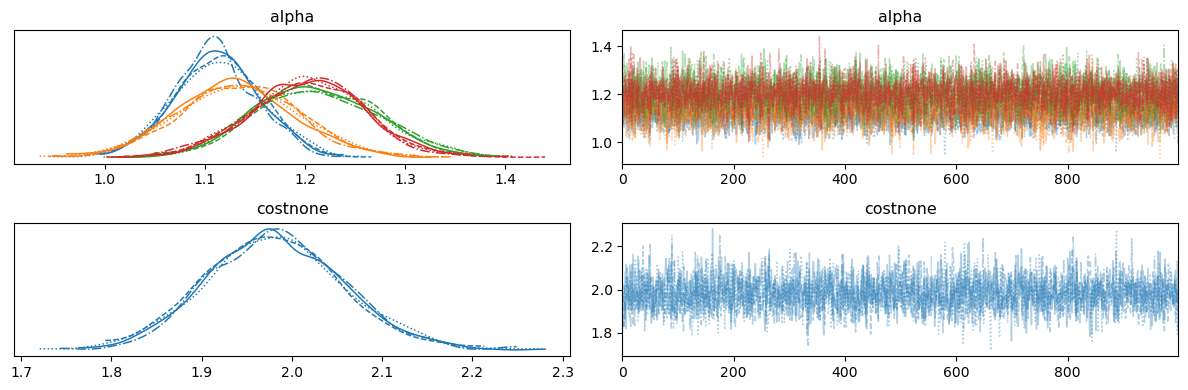

In [101]:
# run with argument strength calculated just using
# the possible observations in the experiment
az.plot_trace(trace_base, var_names="^(?!S1).*$", filter_vars="regex")
plt.tight_layout()
plt.show()

In [102]:
save_trace(
    'base', 
    trace_base,
    path_to_folder=folder_exp2_traces
)

Log-likelihood ratio argstrength RSA

In [103]:
with model_lr_argstrength:
    trace_lr_argstrength = pm.sample(
        draws=1000,
        tune=1000,
        # target_accept=0.95,
        return_inferencedata=True,
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [costnone, beta, alpha]
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/arviz/data/base.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy v

/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 124 seconds.
The number of effective samples is smaller than 25% for some parameters.


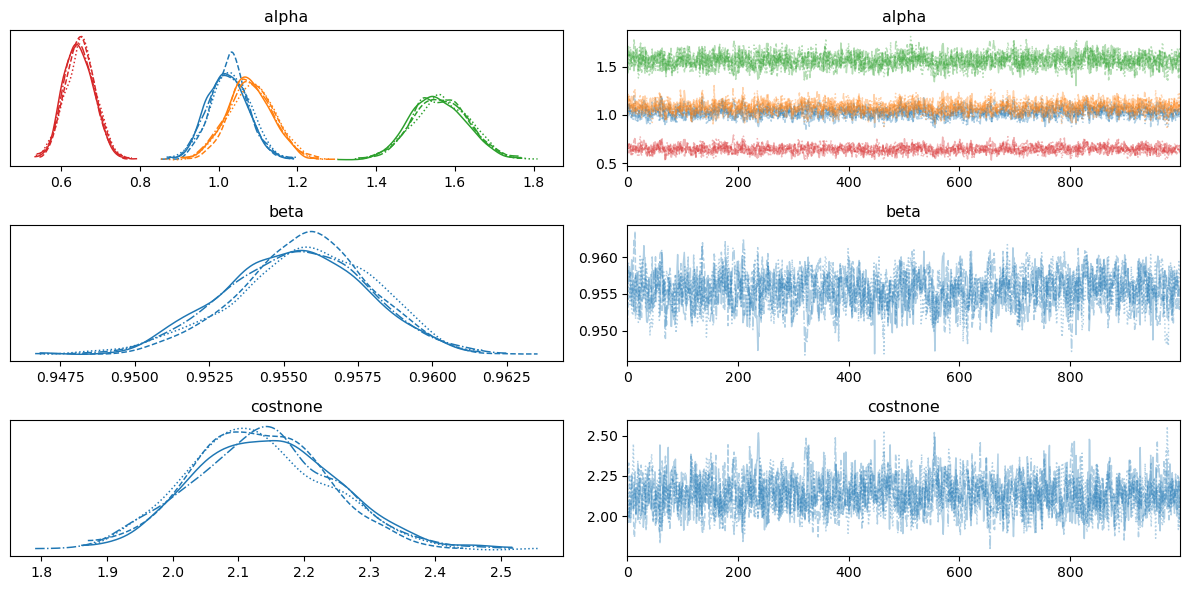

In [104]:
# run with argument strength calculated just using
# the possible observations in the experiment
az.plot_trace(trace_lr_argstrength, var_names="^(?!S1).*$", filter_vars="regex")
plt.tight_layout()
plt.show()

In [105]:
save_trace(
    'lr_argstrength', 
    trace_lr_argstrength,
    path_to_folder=folder_exp2_traces
)

Maximin argstrength RSA

In [106]:
with model_maximin_argstrength:
    trace_maximin_argstrength = pm.sample(
        draws=3000,
        tune=1000,
        target_accept=0.95,
        return_inferencedata=True,
        init='adapt_diag'
    )

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [costnone, beta, alpha]
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/arviz/data/base.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version 

Sampling 4 chains for 1_000 tune and 1_048 draw iterations (4_000 + 4_192 draws total) took 302 seconds.
The number of effective samples is smaller than 25% for some parameters.


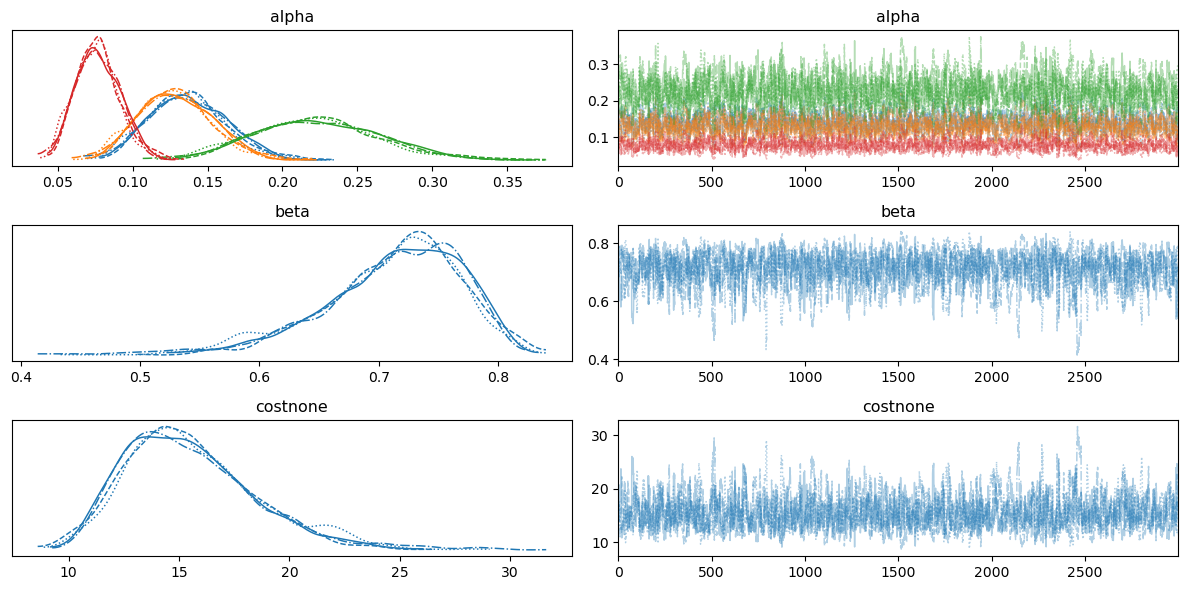

In [ ]:
# run with argument strength calculated just using
# the possible observations in the experiment
az.plot_trace(trace_maximin_argstrength, var_names="^(?!S1).*$", filter_vars="regex")
plt.tight_layout()
plt.show()

In [ ]:
save_trace(
    'maximin_argstrength', 
    trace_maximin_argstrength,
    path_to_folder=folder_exp2_traces
)

S_1 argstrength

In [ ]:
with model_prag_argstrength:
    trace_prag_argstrength = pm.sample(
        draws=3000,
        tune=2000,
        target_accept=0.95,
        return_inferencedata=True
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [costnone, beta, alpha]
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/arviz/data/base.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy v

/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 2_000 tune and 3_000 draw iterations (8_000 + 12_000 draws total) took 402 seconds.
The number of effective samples is smaller than 25% for some parameters.


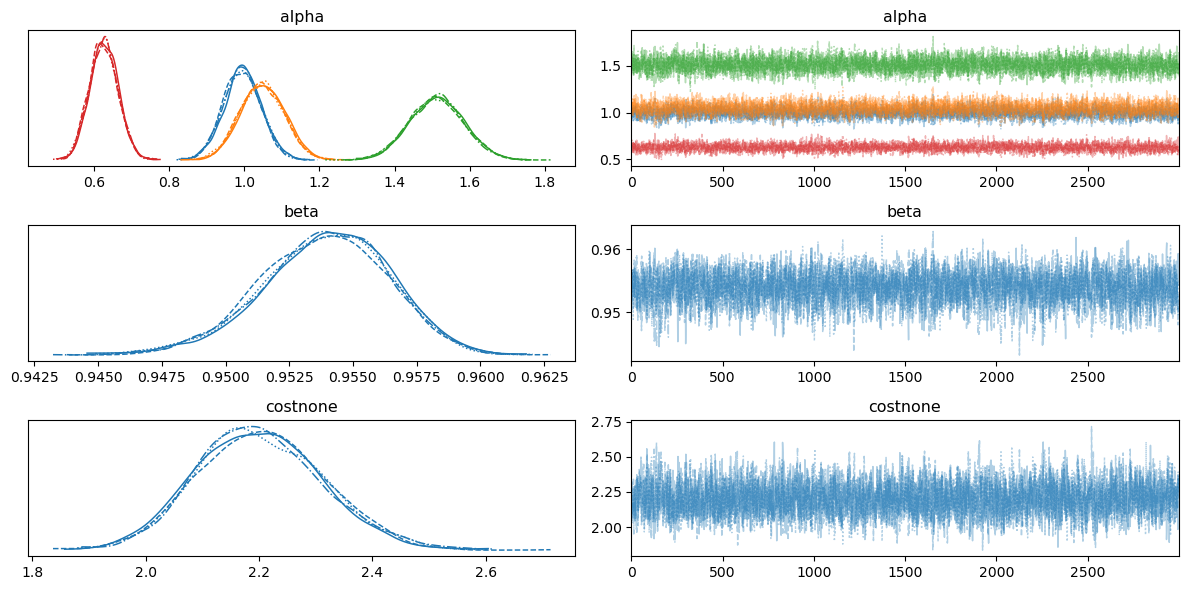

In [ ]:
az.plot_trace(trace_prag_argstrength, var_names="^(?!S1).*$", filter_vars="regex")
plt.tight_layout()

In [ ]:
save_trace(
    'prag_argstrength', 
    trace_prag_argstrength,
    path_to_folder=folder_exp2_traces
)

Nonparametric argstrength RSA

In [ ]:
with model_nonparametric_argstrength:
    trace_nonparametric_argstrength = pm.sample(
        draws=1000,
        tune=1000,
        target_accept=0.95,
        return_inferencedata=True,
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [costnone, beta, alpha]
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/arviz/data/base.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy v

/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/heningwang/miniconda3/envs/RSAarg/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 193 seconds.


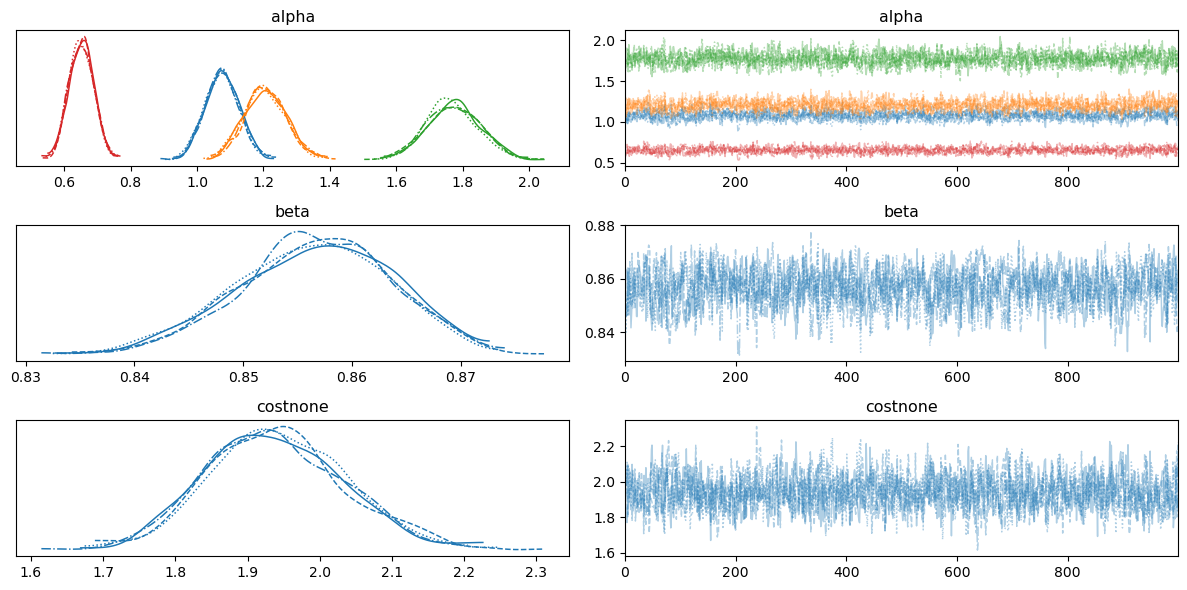

In [ ]:
# run with argument strength calculated just using
# the possible observations in the experiment
az.plot_trace(trace_nonparametric_argstrength, var_names="^(?!S1).*$", filter_vars="regex")
plt.tight_layout()
plt.show()

In [ ]:
save_trace(
    'nonparametric_argstrength', 
    trace_nonparametric_argstrength,
    path_to_folder=folder_exp2_traces
)

# Calculate datapoints to use

Load all traces

In [13]:
trace_base = load_trace(
    'base',
    folder_exp2_traces
)['trace']

trace_lr_argstrength = load_trace(
    'lr_argstrength',
    folder_exp2_traces
)['trace']

trace_maximin_argstrength = load_trace(
    'maximin_argstrength',
    folder_exp2_traces
)['trace']

trace_nonparametric_argstrength = load_trace(
    'nonparametric_argstrength',
    folder_exp2_traces
)['trace']

trace_prag_argstrength = load_trace(
    'prag_argstrength',
    folder_exp2_traces
)['trace']

In [20]:
model_base
model_lr_argstrength
model_maximin_argstrength
model_nonparametric_argstrength
model_prag_argstrength

In [21]:
trace_base
trace_lr_argstrength
trace_maximin_argstrength
trace_nonparametric_argstrength
trace_prag_argstrength

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data
	> constant_data

In [22]:
traces = {
    # predictions for the base model are calculated separately
    # "base": trace_base,
    "lr": trace_lr_argstrength,
    "maximin": trace_maximin_argstrength,
    "nonparametric": trace_nonparametric_argstrength,
    "prag": trace_prag_argstrength
}

We have five models. model \in [base, lr, maxmin, non-parametric, prag]. For each model, we have trace objects from PyMC. For each trace [I am not sure about this, help me to improve this sentence] we compute the posterior predictions with all posterior samples of parameters \theta. (What are the traces exactly?). For S1 we have the following shape (4, 1000, 32, 20), this is a output from S1_base = trace_base.posterior.get('S1_0').values
print(S1_base.shape), then we do the reshaping S1_base = S1_base.reshape(-1,*S1_base.shape[-2:]). Why is that? What does it give me?

In [51]:
S1_base = trace_base.posterior.get('S1_0').values
print(S1_base.shape)
S1_base = S1_base.reshape(-1,*S1_base.shape[-2:])
print(S1_base.shape)

(4, 1000, 32, 20)
(4000, 32, 20)


In [47]:
print(S1_base[0,:,0])
list_possible_observations[3].shape
#possible_utterances.shape

[0.01909757 0.01909757 0.         0.         0.         0.
 0.01909757 0.01909757 0.         0.         0.07175861 0.07175861
 0.08656701 0.08656701 0.         0.         0.         0.
 0.08656701 0.08656701 0.         0.14460814 0.         0.
 0.         0.         0.14460814 0.14460814 0.         0.
 0.         0.        ]


(20, 11)

In [ ]:
S1 = trace_lr_argstrength.posterior.get('S1_0').values
S1.shape
S1[]

(4, 1000, 2, 32, 20)

In [ ]:
import numpy as np
import xarray as xr

EPS = 1e-12

def make_L_type_given_ou(S1_low_c, S1_base_c, S1_high_c, prior=None):
    """
    Build L(type | o,u,theta) from S1_* = p(u | o, type, theta)
    Inputs: each (S,U,O)
    Output: L (S,T,U,O) with T=3 ordered [low, info, high]
    Handles zero-evidence cells by falling back to prior.
    """
    if prior is None:
        prior = np.ones(3) / 3.0
    prior = np.asarray(prior, dtype=float)
    prior = prior / prior.sum()

    # (S,T,U,O)
    S1_types = np.stack([S1_low_c, S1_base_c, S1_high_c], axis=1)
    unnorm = S1_types * prior[None, :, None, None]   # (S,T,U,O)
    Z = unnorm.sum(axis=1, keepdims=True)            # (S,1,U,O)

    # default posterior = prior
    L = np.broadcast_to(prior[None, :, None, None], unnorm.shape).copy()

    # normalize where Z>0
    mask = (Z > 0)                                   # (S,1,U,O)
    normed = unnorm / (Z + EPS)                      # safe even if Z=0, we'll only write where mask
    L[mask.repeat(3, axis=1)] = normed[mask.repeat(3, axis=1)]

    # sanity
    if not np.allclose(L.sum(axis=1), 1.0, atol=1e-6):
        bad = L.sum(axis=1)
        raise ValueError(f"L not normalized. min={bad.min()} max={bad.max()}")

    return L  # (S,3,U,O)

def reshape_base_S1(trace_base, var="S1_0"):
    """
    base trace: (chain, draw, U, O) -> (S,U,O)
    """
    raw = trace_base.posterior.get(var).values
    return raw.reshape(-1, *raw.shape[-2:])

def reshape_argdir_S1(trace, var="S1_0", low_idx=0, high_idx=1):
    """
    argdir trace: (chain, draw, D, U, O) -> S1_low, S1_high each (S,U,O)
    """
    raw = trace.posterior.get(var).values
    # flatten chain/draw -> S, keep last 3 dims (D,U,O)
    flat = raw.reshape(-1, *raw.shape[-3:])  # (S,D,U,O)
    S1_low = flat[:, low_idx, :, :]
    S1_high = flat[:, high_idx, :, :]
    return S1_low, S1_high

# ---------- MAIN: compute per-model matrices and averaged versions ----------

# 1) build base info S1 once
S1_base = reshape_base_S1(trace_base, var="S1_0")  # (S_base,U,O)

# storage
L_by_model = {}        # full (S,3,U,O) per model
Lmean_by_model = {}    # averaged over draws -> (3,U,O) per model
Lmean_stack = []       # list of (3,U,O), same order as model_names
model_names = list(traces.keys())

for name in model_names:
    trace = traces[name]

    # 2) get low/high S1 for this model
    S1_low, S1_high = reshape_argdir_S1(trace, var="S1_0", low_idx=0, high_idx=1)  # each (S,U,O)

    # 3) align sample size across low/high/base
    S_common = min(S1_low.shape[0], S1_high.shape[0], S1_base.shape[0])
    S1_low_c  = S1_low[:S_common]
    S1_high_c = S1_high[:S_common]
    S1_base_c = S1_base[:S_common]

    # 4) compute listener posterior per draw
    L = make_L_type_given_ou(S1_low_c, S1_base_c, S1_high_c, prior=np.ones(3)/3.0)  # (S,3,U,O)

    # 5) average over draws -> (3,U,O)
    L_mean = L.mean(axis=0)

    # 6) store
    L_by_model[name] = L
    Lmean_by_model[name] = L_mean
    Lmean_stack.append(L_mean)

# Stack all averaged matrices together: (M,3,U,O)
Lmean_all_models = np.stack(Lmean_stack, axis=0)

print("Per-model full L shapes:", {k: v.shape for k, v in L_by_model.items()})
print("Per-model mean L shapes:", {k: v.shape for k, v in Lmean_by_model.items()})
print("Stacked mean shape (M,T,U,O):", Lmean_all_models.shape)

Lmean_by_model["lr"].shape #(3, 32, 20)
# Do a panel plot of the averaged L matrices per model
# x = type (low, base, high) axis = 0, y = probability (cell value), panels = utterance x observation

Per-model full L shapes: {'lr': (4000, 3, 32, 20), 'maximin': (4000, 3, 32, 20), 'nonparametric': (4000, 3, 32, 20), 'prag': (4000, 3, 32, 20)}
Per-model mean L shapes: {'lr': (3, 32, 20), 'maximin': (3, 32, 20), 'nonparametric': (3, 32, 20), 'prag': (3, 32, 20)}
Stacked mean shape (M,T,U,O): (4, 3, 32, 20)


(3, 32, 20)

In [69]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import arviz as az


# define output directory
OUT_DIR = "./listener_side/item_generation"
os.makedirs(OUT_DIR, exist_ok=True)

# global constants
MODEL_ORDER = ["lr", "maximin", "nonparametric", "prag"]  # adjust if needed
TYPE_ORDER = ["low", "info", "high"]  # must match L_mean type axis order [0,1,2]


# ---------------------------
# Label helpers
# ---------------------------
def dense_obs_label(obs, max_elems=20):
    """Dense label like 12|12|...|0 for an observation."""
    if isinstance(obs, str):
        s = " ".join(obs.split())
        return s

    try:
        vals = list(obs)
    except TypeError:
        return str(obs)

    def to_str(x):
        try:
            if isinstance(x, (int, np.integer)):
                return str(int(x))
            if isinstance(x, (float, np.floating)) and float(x).is_integer():
                return str(int(x))
        except Exception:
            pass
        return str(x)

    parts = [to_str(v) for v in vals]
    if len(parts) > max_elems:
        head = parts[: max_elems // 2]
        tail = parts[-(max_elems // 2):]
        parts = head + ["..."] + tail
    return "|".join(parts)

def utt_label_short(possible_utterances, utt, sep=" / "):
    Q, A1, A2 = possible_utterances[utt]
    return f"{Q}{sep}{A1}{sep}{A2}"

def obs_label_short(list_possible_observations, obs_idx):
    obs = list_possible_observations[0][obs_idx]
    return dense_obs_label(obs)


# ---------------------------
# Plotting
# ---------------------------
def plot_L_panels_compact(
    L_mean,
    possible_utterances,
    list_possible_observations,
    type_labels=("low", "info", "high"),
    model_name=None,
    sharey=True,
    highlight_rule=True,
    highlight_color="red",
    highlight_lw=2.0,
    obs_rotation=90
):
    """
    Panel plot: rows=utterance, cols=observation.
    Each panel shows p(type | o,u) as bars over types.

    Highlights panels where info > low + high with a red frame.
    """
    L_mean = np.asarray(L_mean)
    assert L_mean.ndim == 3, f"Expected (T,U,O), got {L_mean.shape}"
    T, U, O = L_mean.shape
    assert T == 3, "Highlight rule assumes type order is (low, info, high) with T=3."

    utt_labels = [utt_label_short(possible_utterances, u) for u in range(U)]
    obs_labels = [obs_label_short(list_possible_observations, o) for o in range(O)]

    fig_w = max(12, O * 0.55)
    fig_h = max(6, U * 0.33)
    fig, axes = plt.subplots(U, O, figsize=(fig_w, fig_h), sharey=sharey)
    axes = np.atleast_2d(axes)

    x = np.arange(T)

    for u in range(U):
        for o in range(O):
            ax = axes[u, o]
            vals = L_mean[:, u, o]

            ax.bar(x, vals)
            ax.set_ylim(0, 1)

            ax.set_xticks([])
            ax.set_yticks([])

            if o == 0:
                ax.set_yticks([0, 0.5, 1.0])
                ax.set_yticklabels(["0", "0.5", "1"], fontsize=7)

            if u == U - 1:
                ax.set_xticks(x)
                ax.set_xticklabels(type_labels, rotation=90, fontsize=7)

            if highlight_rule:
                low, info, high = vals[0], vals[1], vals[2]
                if info > (low + high):
                    rect = Rectangle(
                        (0, 0), 1, 1,
                        transform=ax.transAxes,
                        fill=False,
                        edgecolor=highlight_color,
                        linewidth=highlight_lw,
                        zorder=10,
                        clip_on=False
                    )
                    ax.add_patch(rect)

    for u in range(U):
        axes[u, 0].set_ylabel(utt_labels[u], fontsize=7, rotation=0, labelpad=36, va="center")

    for o in range(O):
        axes[0, o].set_title(obs_labels[o], fontsize=7, rotation=obs_rotation, va="bottom")

    title = "Averaged listener beliefs p(type | o,u)"
    if model_name is not None:
        title += f" — {model_name}"
    fig.suptitle(title, y=1.01)

    fig.tight_layout()
    return fig

def save_panel_plot(model_name, L_mean, filename):
    fig = plot_L_panels_compact(
        L_mean,
        possible_utterances=possible_utterances,
        list_possible_observations=list_possible_observations,
        type_labels=TYPE_ORDER,
        model_name=model_name,
        highlight_rule=True,
        obs_rotation=90
    )
    out_path = os.path.join(OUT_DIR, filename)
    fig.savefig(out_path, dpi=200, bbox_inches="tight")
    plt.close(fig)
    return out_path


# ---------------------------
# DataFrame builder
# ---------------------------
def build_listener_df_for_model(model_name, L_mean):
    """
    L_mean: (3,U,O) averaged over draws for one model.
    One row per (utt, obs) cell.
    """
    L_mean = np.asarray(L_mean)
    assert L_mean.shape[0] == 3, f"{model_name}: expected (3,U,O), got {L_mean.shape}"

    _, U, O = L_mean.shape
    utts, obss = np.unravel_index(np.arange(U * O), (U, O))

    low  = L_mean[0, utts, obss]
    info = L_mean[1, utts, obss]
    high = L_mean[2, utts, obss]

    df = pd.DataFrame({
        "model": model_name,
        "utt_idx": utts.astype(int),
        "obs_idx": obss.astype(int),
        "p_low": low,
        "p_info": info,
        "p_high": high,
        "highlight_info_gt_low_plus_high": info > (low + high),
    })

    # Keep labels (can be large; comment out if you want smaller CSV)
    df["utt_label"] = [f"{possible_utterances[u][0]} / {possible_utterances[u][1]} / {possible_utterances[u][2]}"
                       for u in df["utt_idx"].to_numpy()]
    df["obs_label"] = [str(list_possible_observations[0][o]) for o in df["obs_idx"].to_numpy()]

    return df


# ---------------------------
# Robust stacking weights
# ---------------------------
def _extract_elpd_loo(loo_res):
    """
    Robustly extract elpd_loo from ArviZ loo result across versions.
    ArviZ returns an ELPDData (often pandas-like). Prefer key access.
    """
    # Most common: ELPDData behaves like a pandas Series with index keys
    for key in ["elpd_loo", "loo", "elpd"]:
        try:
            if key in loo_res:
                return float(loo_res[key])
        except TypeError:
            # some versions don't support "key in loo_res"
            pass

    # Fallback: try .get (works for pandas-like objects)
    try:
        val = loo_res.get("elpd_loo", None)
        if val is not None:
            return float(val)
    except Exception:
        pass

    raise AttributeError(
        f"Could not find elpd_loo in loo result. Available keys/index: "
        f"{getattr(loo_res, 'index', getattr(loo_res, 'keys', lambda: 'UNKNOWN')())}"
    )

def get_model_weights_via_loo(traces_dict, model_order):
    """
    Computes weights using PSIS-LOO ELPD and a softmax transform.
    This avoids az.compare(method='stacking') which is broken in your env.

    Returns:
      weights: pd.Series indexed by model
      loo_table: pd.DataFrame with elpd_loo per model
    """
    rows = []
    for m in model_order:
        loo_res = az.loo(traces_dict[m])   # requires log_likelihood in trace
        elpd = _extract_elpd_loo(loo_res)
        rows.append({"model": m, "elpd_loo": elpd})

    loo_table = pd.DataFrame(rows).set_index("model").sort_values("elpd_loo", ascending=False)

    # softmax over elpd_loo for weights
    x = loo_table["elpd_loo"].to_numpy()
    x = x - np.max(x)          # stability
    w = np.exp(x)
    w = w / w.sum()

    weights = pd.Series(w, index=loo_table.index, name="weight")
    return weights, loo_table
# ------------------------------------------------------------
# 1) Build per-model dataframes + 2) iterate models and save 4 plots
# ------------------------------------------------------------
dfs = []
saved_figs = []

for model_name in MODEL_ORDER:
    if model_name not in Lmean_by_model:
        raise KeyError(f"Missing {model_name} in Lmean_by_model. Available: {list(Lmean_by_model.keys())}")

    L_mean = Lmean_by_model[model_name]  # (3,U,O)

    df_m = build_listener_df_for_model(model_name, L_mean)
    dfs.append(df_m)

    saved_figs.append(
        save_panel_plot(model_name, L_mean, f"listener_panels_{model_name}.png")
    )

df_all = pd.concat(dfs, ignore_index=True)
df_highlighted = df_all[df_all["highlight_info_gt_low_plus_high"]].copy()


# ------------------------------------------------------------
# 3) Model-averaged fifth plot (LOO-weighted; avoids az.compare stacking bug)
# ------------------------------------------------------------

weights, loo_table = get_model_weights_via_loo(traces, MODEL_ORDER)

print("LOO ELPD table:\n", loo_table)
print("\nWeights (softmax over elpd_loo):\n", weights)

# Save diagnostics
loo_table.to_csv(os.path.join(OUT_DIR, "model_loo_elpd_table.csv"))
weights.to_csv(os.path.join(OUT_DIR, "model_weights_softmax_elpd_loo.csv"))

# Weighted average of listener matrices
L_mean_avg = np.zeros_like(Lmean_by_model[MODEL_ORDER[0]], dtype=float)

for m in weights.index:  # note: weights are sorted by elpd_loo
    L_mean_avg += float(weights.loc[m]) * Lmean_by_model[m]

# sanity: each (u,o) should sum to 1 across types
if not np.allclose(L_mean_avg.sum(axis=0), 1.0, atol=1e-6):
    bad = L_mean_avg.sum(axis=0)
    raise ValueError(f"Model-averaged L not normalized. min={bad.min()} max={bad.max()}")

avg_model_name = "model_avg_softmax_elpd_loo"

saved_figs.append(
    save_panel_plot(avg_model_name, L_mean_avg, f"listener_panels_{avg_model_name}.png")
)

df_avg = build_listener_df_for_model(avg_model_name, L_mean_avg)

# Export df_avg under the correct filename
csv_path_avg = os.path.join(OUT_DIR, f"listener_beliefs_{avg_model_name}.csv")
df_avg.to_csv(csv_path_avg, index=False)
print(" -", csv_path_avg)

# ------------------------------------------------------------
# 4) Export
# ------------------------------------------------------------
csv_path = os.path.join(OUT_DIR, "listener_beliefs_by_model_u_o.csv")
df_all.to_csv(csv_path, index=False)

csv_path_hi = os.path.join(OUT_DIR, "listener_beliefs_highlighted_only.csv")
df_highlighted.to_csv(csv_path_hi, index=False)

csv_path_avg = os.path.join(OUT_DIR, f"listener_beliefs_{avg_model_name}.csv")
df_avg.to_csv(csv_path_avg, index=False)

print("\nSaved figures:")
for p in saved_figs:
    print(" -", p)

print("\nSaved CSVs:")
print(" -", csv_path)
print(" -", csv_path_hi)
print(" -", csv_path_avg)

LOO ELPD table:
                   elpd_loo
model                     
nonparametric -5751.748973
maximin       -5784.537543
lr            -6057.176625
prag          -6073.235636

Weights (softmax over elpd_loo):
 model
nonparametric     1.000000e+00
maximin           5.755790e-15
lr               2.261810e-133
prag             2.399475e-140
Name: weight, dtype: float64
 - ./listener_side/item_generation/listener_beliefs_model_avg_softmax_elpd_loo.csv

Saved figures:
 - ./listener_side/item_generation/listener_panels_lr.png
 - ./listener_side/item_generation/listener_panels_maximin.png
 - ./listener_side/item_generation/listener_panels_nonparametric.png
 - ./listener_side/item_generation/listener_panels_prag.png
 - ./listener_side/item_generation/listener_panels_model_avg_softmax_elpd_loo.png

Saved CSVs:
 - ./listener_side/item_generation/listener_beliefs_by_model_u_o.csv
 - ./listener_side/item_generation/listener_beliefs_highlighted_only.csv
 - ./listener_side/item_generation/listen

# Compare model predictions with empirical distributions

Procedure

1.	Load the item tables, which specify the utterance–observation (u, o) pairs associated with each experimental condition. For each condition (high, info, low), the table contains 10 items.
2.	Subset the item tables by condition and retain only the items from the high and low conditions for further analysis.
3.	Load the empirical results from a CSV file. Using these data, compute the empirical response proportions for speaker types (high, info, low), aggregated by utterance–observation pairs and by condition (high vs. low).
4.	For each of the four models, as well as for the weighted model average (five predictors in total), compute a measure of closeness between the model-predicted and empirical distributions over speaker types, aggregated by utterance–observation pairs and conditions (high vs. low). Identify the model that provides the closest fit to the empirical data.
5.	Based on this best-fitting model, select 10 utterance–observation pairs that satisfy the criterion
p(info) > p(high) + p(low).
These selected pairs are then used as new items in the info condition.

In [88]:
# Load item tables + results (robust to small formatting differences)
import os
import re
import numpy as np
import pandas as pd


# -----------------------------
# Config
# -----------------------------
path_item_tables = "../experiments/listener_side/items/final_listener_items.csv"
path_results     = "../data/data_listenerside/data_pilot1.csv"

OUT_DIR = "./listener_side/item_generation"
os.makedirs(OUT_DIR, exist_ok=True)

# Column config (explicit, since you know the schema)
ITEMS_COLS = {
    "condition": "condition",
    "Q1": "Q1",
    "Q2": "Q2",
    "A": "A",
    "observation": "observation",
}
RESULTS_COLS = {
    "condition": "condition",
    "Q1": "Q1",
    "Q2": "Q2",
    "A": "A",
    "observation": "studentsArray",
    "response": "response",
}

# Response coding in pilot data
RESPONSE_MAPPING = {"Student": "low", "Teacher": "high", "Principal": "info"}
VALID_TYPES = {"low", "info", "high"}

# Conditions to keep (drop "sample*" etc.)
KEEP_CONDITIONS = {"high", "low", "info"}


# -----------------------------
# Load
# -----------------------------
items = pd.read_csv(path_item_tables)
results = pd.read_csv(path_results, keep_default_na=False, na_values=[""])

print("items columns:", items.columns.tolist())
print("results columns:", results.columns.tolist())


results['Q1'] = results['Q1'].astype(str)
# -----------------------------
# Helpers: validation & normalization
# -----------------------------
def require_columns(df, cols, df_name="df"):
    missing = [c for c in cols if c not in df.columns]
    if missing:
        raise ValueError(f"{df_name} missing columns: {missing}\nAvailable: {df.columns.tolist()}")

def normalize_text(x) -> str:
    """Lowercase, strip, collapse whitespace; return empty string for NA."""
    s = str(x).strip().lower()
    s = re.sub(r"\s+", " ", s)
    return s

def normalize_utt(x) -> str:
    """
    Canonicalize utterance component:
    - lower
    - trim whitespace
    - remove trailing '.' (results A sometimes has a period)
    """
    s = normalize_text(x)
    s = re.sub(r"[.]+$", "", s)
    return s

def parse_items_observation(obs_str: str):
    """Parse items observation like '[0, 0, 0, 0, 0]' into list[int]."""
    if pd.isna(obs_str):
        return []
    nums = re.findall(r"-?\d+", str(obs_str))
    return [int(n) for n in nums]

def parse_results_observation(students_array: str):
    """Parse results observation like '12|3|0|0|0' into list[int]."""
    if pd.isna(students_array):
        return []
    parts = [p.strip() for p in str(students_array).split("|") if p.strip() != ""]
    out = []
    for p in parts:
        m = re.findall(r"-?\d+", p)
        out.append(int(m[0]) if m else 0)
    return out

def obs_to_key(obs_list):
    """Canonical observation join key: '12|3|0|0|0'."""
    return "|".join(str(int(x)) for x in obs_list)

def summarize_unmatched(merged, join_cols, out_dir, n=200):
    n_unmatched = merged["item_id"].isna().sum()
    print(f"Unmatched results rows (no item_id found): {n_unmatched}")
    if n_unmatched > 0:
        dbg_path = os.path.join(out_dir, "unmatched_results_rows.csv")
        merged.loc[merged["item_id"].isna(), join_cols + [RESULTS_COLS["response"]]].head(n).to_csv(dbg_path, index=False)
        print(f"Saved up to {n} unmatched rows to: {dbg_path}")


# -----------------------------
# Validate schema
# -----------------------------
require_columns(items, ITEMS_COLS.values(), df_name="items")
require_columns(results, RESULTS_COLS.values(), df_name="results")


# -----------------------------
# Data cleansing (results)
# -----------------------------
# Drop NA responses
results = results[~results[RESULTS_COLS["response"]].isna()].copy()

# Drop condition starting with 'sample' (robust)
cond_series = results[RESULTS_COLS["condition"]].astype(str)
results = results[~cond_series.str.lower().str.startswith("sample")].copy()

# Normalize condition strings
results[RESULTS_COLS["condition"]] = results[RESULTS_COLS["condition"]].map(normalize_text)

# Keep only expected conditions (optional; remove if you want all)
results = results[results[RESULTS_COLS["condition"]].isin(KEEP_CONDITIONS)].copy()

# Map response roles -> types
results[RESULTS_COLS["response"]] = results[RESULTS_COLS["response"]].map(RESPONSE_MAPPING)

# Drop rows that did not map (safety)
results = results[results[RESULTS_COLS["response"]].isin(VALID_TYPES)].copy()

# Reset index after filtering
results = results.reset_index(drop=True)

print("\nAfter cleansing results:")
print("  n rows:", len(results))
print("  conditions:", results[RESULTS_COLS["condition"]].value_counts().to_dict())
print("  responses:", results[RESULTS_COLS["response"]].value_counts().to_dict())


# -----------------------------
# Build canonical join keys
# -----------------------------
items_key = items.copy()
results_key = results.copy()

# create item_id if not present
if "item_id" not in items_key.columns:
    items_key["item_id"] = np.arange(len(items_key), dtype=int)

# utterance keys
for c in ["Q1", "Q2", "A"]:
    items_key[f"{c}_key"] = items_key[ITEMS_COLS[c]].map(normalize_utt)
    results_key[f"{c}_key"] = results_key[RESULTS_COLS[c]].map(normalize_utt)

# observation keys
items_key["obs_key"] = items_key[ITEMS_COLS["observation"]].map(parse_items_observation).map(obs_to_key)
results_key["obs_key"] = results_key[RESULTS_COLS["observation"]].map(parse_results_observation).map(obs_to_key)

# condition keys
items_key["condition_key"] = items_key[ITEMS_COLS["condition"]].map(normalize_text)
results_key["condition_key"] = results_key[RESULTS_COLS["condition"]].map(normalize_text)

# response key (already mapped to low/info/high)
results_key["response_key"] = results_key[RESULTS_COLS["response"]].map(normalize_text)

join_cols = ["condition_key", "Q1_key", "Q2_key", "A_key", "obs_key"]

print("\nExample keys (items):")
print(items_key[join_cols + ["item_id"]].head())

print("\nExample keys (results):")
print(results_key[join_cols + ["response_key"]].head())


# -----------------------------
# Merge results -> items (attach item_id)
# -----------------------------
# NOTE: validate="m:1" assumes each (cond, Q1, Q2, A, obs) appears at most once in items.
# If you have duplicates in items, change to validate="m:m" and investigate duplicates.
merged = results_key.merge(
    items_key[join_cols + ["item_id"]],
    on=join_cols,
    how="left",
    validate="m:1"
)

print(f"\nMerged rows: {len(merged)}")
summarize_unmatched(merged, join_cols, OUT_DIR, n=200)

# keep only matched rows
merged_matched = merged.dropna(subset=["item_id"]).copy()
merged_matched["item_id"] = merged_matched["item_id"].astype(int)


# -----------------------------
# Empirical proportions per (condition, item_id)
# -----------------------------
# Count responses
counts = (
    merged_matched
    .groupby(["condition_key", "item_id", "response_key"])
    .size()
    .rename("n")
    .reset_index()
)

# Total per item
totals = (
    counts
    .groupby(["condition_key", "item_id"])["n"]
    .sum()
    .rename("n_total")
    .reset_index()
)

emp = counts.merge(totals, on=["condition_key", "item_id"], how="left")
emp["p"] = emp["n"] / emp["n_total"]

# Pivot to wide probabilities
emp_wide = (
    emp.pivot_table(index=["condition_key", "item_id"], columns="response_key", values="p", fill_value=0.0)
    .reset_index()
)

# Ensure all three columns exist (even if absent in some subsets)
for col in ["low", "info", "high"]:
    if col not in emp_wide.columns:
        emp_wide[col] = 0.0

emp_wide = emp_wide.rename(columns={"low": "p_low_emp", "info": "p_info_emp", "high": "p_high_emp"})

# Attach original item info for readability
emp_wide = emp_wide.merge(
    items_key[["item_id", ITEMS_COLS["condition"], ITEMS_COLS["Q1"], ITEMS_COLS["Q2"], ITEMS_COLS["A"], ITEMS_COLS["observation"], "obs_key"]],
    on="item_id",
    how="left"
)

# Basic sanity checks
prob_sum = emp_wide[["p_low_emp", "p_info_emp", "p_high_emp"]].sum(axis=1)
if not np.allclose(prob_sum.to_numpy(), 1.0, atol=1e-8):
    print("\n[WARN] Some empirical probability rows do not sum to 1. Showing worst 10:")
    tmp = emp_wide.assign(prob_sum=prob_sum).sort_values("prob_sum")
    print(tmp[["condition_key", "item_id", "p_low_emp", "p_info_emp", "p_high_emp", "prob_sum"]].head(10))

print("\nEmpirical proportions (head):")
print(emp_wide.head())

# Save empirical table
emp_out = os.path.join(OUT_DIR, "empirical_proportions_by_item.csv")
emp_wide.to_csv(emp_out, index=False)
print(f"\nSaved empirical proportions table to: {emp_out}")

items columns: ['Q1', 'Q2', 'A', 'observation', 'condition', 'factor_high', 'factor_low', 'avg_factor']
results columns: ['submission_id', 'A', 'Q1', 'Q2', 'age', 'comments', 'completed_text', 'condition', 'education', 'experiment_duration', 'experiment_end_time', 'experiment_start_time', 'gender', 'languages', 'nQuestions', 'names', 'options', 'prolific_pid', 'prolific_session_id', 'prolific_study_id', 'qud', 'question', 'response', 'responseTime', 'responses', 'studentsArray', 'text']

After cleansing results:
  n rows: 750
  conditions: {'info': 250, 'low': 250, 'high': 250}
  responses: {'high': 290, 'low': 250, 'info': 210}

Example keys (items):
  condition_key Q1_key Q2_key  A_key      obs_key  item_id
0          high   some   some  wrong    0|0|0|0|0        0
1          high   some   none  wrong  12|12|3|0|0        1
2          high   some   most  wrong    0|0|0|0|0        2
3          high    all   some  wrong    0|0|0|0|0        3
4          high   none    all  right    0|0|0

In [95]:
# ------------------------------------------------------------
# Step 1) Load model prediction CSVs and stack them into one df
# ------------------------------------------------------------
path_models = {
    "average": "./listener_side/item_generation/listener_beliefs_model_avg_softmax_elpd_loo.csv",
    "four_models": "./listener_side/item_generation/listener_beliefs_by_model_u_o.csv",
}

df_four = pd.read_csv(path_models["four_models"])
df_avg  = pd.read_csv(path_models["average"])

# Basic sanity checks (required columns)
req = {"model", "utt_idx", "obs_idx", "p_low", "p_info", "p_high"}
missing_four = req - set(df_four.columns)
missing_avg  = req - set(df_avg.columns)
if missing_four:
    raise ValueError(f"four_models CSV missing columns: {sorted(missing_four)}")
if missing_avg:
    raise ValueError(f"average CSV missing columns: {sorted(missing_avg)}")

# Ensure consistent dtypes
for df in (df_four, df_avg):
    df["utt_idx"] = df["utt_idx"].astype(int)
    df["obs_idx"] = df["obs_idx"].astype(int)
    for c in ["p_low", "p_info", "p_high"]:
        df[c] = df[c].astype(float)

# Standardize the average model name so it doesn't collide / stays clear
df_avg = df_avg.copy()
df_avg["model"] = "average"

# Stack: 4 models + average
pred_all = pd.concat([df_four, df_avg], ignore_index=True)

print("Loaded predictions:")
print("  four_models rows:", len(df_four))
print("  average rows:    ", len(df_avg))
print("  stacked rows:    ", len(pred_all))
print("\nModels in stacked df:", pred_all["model"].value_counts())

# Optional sanity: probabilities sum to 1
prob_sum = pred_all[["p_low", "p_info", "p_high"]].sum(axis=1)
if not (abs(prob_sum - 1.0) < 1e-6).all():
    print("\n[WARN] Some prediction rows do not sum to 1 (showing 10 worst):")
    tmp = pred_all.assign(_sum=prob_sum).sort_values("_sum")
    print(tmp[["model","utt_idx","obs_idx","p_low","p_info","p_high","_sum"]].head(10))

pred_all.head()

Loaded predictions:
  four_models rows: 2560
  average rows:     640
  stacked rows:     3200

Models in stacked df: model
lr               640
maximin          640
nonparametric    640
prag             640
average          640
Name: count, dtype: int64


,model,utt_idx,obs_idx,p_low,p_info,p_high,highlight_info_gt_low_plus_high,utt_label,obs_label
0,lr,0,0,0.228614,0.377391,0.393996,False,none / none / right,[9 9 3 3 3]
1,lr,0,1,0.880174,0.117441,0.002386,False,none / none / right,[12 12 12 12 12]
2,lr,0,2,0.333333,0.333333,0.333333,False,none / none / right,[9 9 9 0 0]
3,lr,0,3,0.568795,0.347801,0.083404,False,none / none / right,[9 9 9 9 9]
4,lr,0,4,0.333333,0.333333,0.333333,False,none / none / right,[12 12 0 0 0]


In [99]:
import re

# ------------------------------------------------------------
# Step 2) Build robust text keys in BOTH empirical + prediction dfs
#   pred_all keys: utt_label, obs_label
#   emp_hl keys:   Q1, Q2, A, plus observation (string like "[0, 0, 0, 0, 0]")
# Goal: merge on (condition_key, utt_key, obs_key)
# ------------------------------------------------------------

# ---------- helpers ----------
def normalize_text(x) -> str:
    if pd.isna(x):
        return ""
    s = str(x).strip().lower()
    s = re.sub(r"\s+", " ", s)
    return s

def normalize_utt_component(x) -> str:
    # remove trailing periods (A in results sometimes has '.')
    s = normalize_text(x)
    s = re.sub(r"[.]+$", "", s)
    return s

def utt_triplet_to_key(q1, q2, a, sep=" / "):
    return f"{normalize_utt_component(q1)}{sep}{normalize_utt_component(q2)}{sep}{normalize_utt_component(a)}"

def parse_obs_any_to_list(x):
    """
    Handles:
      - "[0, 0, 0, 0, 0]"
      - "[9 9 3 3 3]"
      - "12|3|0|0|0"
      - actual lists/arrays
    """
    if pd.isna(x):
        return []
    # already list-like
    if isinstance(x, (list, tuple, np.ndarray)):
        return [int(v) for v in x]
    s = str(x).strip()
    # if pipe-delimited
    if "|" in s:
        parts = [p for p in s.split("|") if p.strip() != ""]
        out = []
        for p in parts:
            m = re.findall(r"-?\d+", p)
            out.append(int(m[0]) if m else 0)
        return out
    # otherwise extract all ints from string (covers brackets/commas/spaces)
    nums = re.findall(r"-?\d+", s)
    return [int(n) for n in nums]

def obs_list_to_key(lst):
    return "|".join(str(int(v)) for v in lst)

def obs_to_key(x):
    return obs_list_to_key(parse_obs_any_to_list(x))


# ---------- 2A) build keys for pred_all ----------
if not {"utt_label", "obs_label"}.issubset(pred_all.columns):
    raise ValueError("pred_all must contain utt_label and obs_label columns.")

pred_key = pred_all.copy()
pred_key["condition_key"] = pred_key.get("condition_key", "")  # may not exist; we'll add later if needed
pred_key["utt_key"] = pred_key["utt_label"].map(lambda s: " / ".join([normalize_utt_component(p) for p in str(s).split("/")]))
pred_key["obs_key"] = pred_key["obs_label"].map(obs_to_key)

# quick sanity
print("pred_key example:")
print(pred_key[["model", "utt_label", "utt_key", "obs_label", "obs_key"]].head())


# ---------- 2B) build keys for emp_hl ----------
# Expect emp_hl to have Q1,Q2,A and an observation column OR already has utt_label/obs_label.
emp_key = emp_hl.copy()

# condition_key should already exist; if not, create from condition
if "condition_key" not in emp_key.columns:
    if "condition" in emp_key.columns:
        emp_key["condition_key"] = emp_key["condition"].map(normalize_text)
    else:
        raise ValueError("emp_hl must have condition_key or condition.")

# Build utt_key
if {"Q1", "Q2", "A"}.issubset(emp_key.columns):
    emp_key["utt_key"] = emp_key.apply(lambda r: utt_triplet_to_key(r["Q1"], r["Q2"], r["A"]), axis=1)
elif "utt_label" in emp_key.columns:
    emp_key["utt_key"] = emp_key["utt_label"].map(lambda s: " / ".join([normalize_utt_component(p) for p in str(s).split("/")]))
else:
    raise ValueError("emp_hl must have (Q1,Q2,A) or utt_label.")

# Build obs_key
# Try common empirical observation columns
obs_col_emp = None
for c in ["observation", "obs_label", "studentsArray", "obs"]:
    if c in emp_key.columns:
        obs_col_emp = c
        break
if obs_col_emp is None:
    raise ValueError("emp_hl must have an observation column like 'observation' (or provide obs_label).")

emp_key["obs_key"] = emp_key[obs_col_emp].map(obs_to_key)

print("\nemp_key example:")
show_cols = ["condition_key", "utt_key", "obs_key", "p_low_emp", "p_info_emp", "p_high_emp"]
print(emp_key[show_cols].head())


# ---------- 2C) merge predictions with empirical ----------
# Note: condition_key is included. If your pred_all does NOT include condition_key,
# we merge only on (utt_key, obs_key), then reattach condition from emp_key.
pred_has_condition = "condition_key" in pred_key.columns and pred_key["condition_key"].astype(str).str.len().gt(0).any()

if pred_has_condition:
    merge_cols = ["condition_key", "utt_key", "obs_key"]
else:
    merge_cols = ["utt_key", "obs_key"]

merged = pred_key.merge(
    emp_key,
    on=merge_cols,
    how="inner",
    suffixes=("_pred", "_emp"),
)

print("\nMerged rows:", len(merged))
print("Merged models:", merged["model"].value_counts().to_dict())

# If pred didn't have condition_key, pull it from empirical side for later steps
if "condition_key" not in merged.columns:
    merged["condition_key"] = merged["condition_key_emp"]

# Optional: save merged for inspection
# merged.to_csv(os.path.join(OUT_DIR, "pred_vs_emp_merged_by_text_keys.csv"), index=False)

merged.head()

pred_key example:
  model            utt_label              utt_key         obs_label  \
0    lr  none / none / right  none / none / right       [9 9 3 3 3]   
1    lr  none / none / right  none / none / right  [12 12 12 12 12]   
2    lr  none / none / right  none / none / right       [9 9 9 0 0]   
3    lr  none / none / right  none / none / right       [9 9 9 9 9]   
4    lr  none / none / right  none / none / right  [12 12  0  0  0]   

          obs_key  
0       9|9|3|3|3  
1  12|12|12|12|12  
2       9|9|9|0|0  
3       9|9|9|9|9  
4     12|12|0|0|0  

emp_key example:
  condition_key              utt_key      obs_key  p_low_emp  p_info_emp  \
0          high  some / some / wrong    0|0|0|0|0       0.20        0.08   
1          high  some / none / wrong  12|12|3|0|0       0.04        0.28   
2          high  some / most / wrong    0|0|0|0|0       0.28        0.12   
3          high   all / some / wrong    0|0|0|0|0       0.36        0.24   
4          high   none / all / right 

,model,utt_idx,obs_idx,p_low,p_info,p_high,highlight_info_gt_low_plus_high,utt_label,obs_label,condition_key_pred,...,item_id,p_high_emp,p_info_emp,p_low_emp,condition,Q1,Q2,A,observation,condition_key
0,lr,6,15,0.002386,0.117441,0.880174,False,none / all / right,[0 0 0 0 0],,...,4,0.28,0.44,0.28,high,none,all,right,"[0, 0, 0, 0, 0]",high
1,lr,7,1,0.880174,0.117441,0.002386,False,none / all / wrong,[12 12 12 12 12],,...,23,0.16,0.56,0.28,low,none,all,wrong,"[12, 12, 12, 12, 12]",low
2,lr,8,5,0.776251,0.210551,0.013198,False,some / none / right,[12 12 9 0 0],,...,28,0.08,0.36,0.56,low,some,none,right,"[12, 12, 9, 0, 0]",low
3,lr,8,18,0.838030,0.158430,0.003540,False,some / none / right,[12 12 12 0 0],,...,24,0.08,0.24,0.68,low,some,none,right,"[12, 12, 12, 0, 0]",low
4,lr,9,4,0.003540,0.158430,0.838030,False,some / none / wrong,[12 12 0 0 0],,...,6,0.72,0.16,0.12,high,some,none,wrong,"[12, 12, 0, 0, 0]",high


In [100]:
import numpy as np
import pandas as pd

# ------------------------------------------------------------
# Step 3) Quantify model–data alignment and identify best model
# ------------------------------------------------------------
# We assume `merged` exists from the previous step and contains:
#   model,
#   p_low, p_info, p_high           (model predictions)
#   p_low_emp, p_info_emp, p_high_emp (empirical)
#   condition_key, utt_key, obs_key
#
# We compute multiple goodness-of-fit metrics for robustness.
# ------------------------------------------------------------

# ---------- helpers ----------
def tv_distance(p, q):
    """
    Total Variation distance between two categorical distributions.
    p, q: arrays of shape (..., 3)
    """
    return 0.5 * np.sum(np.abs(p - q), axis=-1)

def l2_distance(p, q):
    """Squared L2 distance."""
    return np.sum((p - q) ** 2, axis=-1)

def cross_entropy(p_emp, p_model, eps=1e-12):
    """
    Cross-entropy H(p_emp, p_model).
    Lower is better.
    """
    p_model = np.clip(p_model, eps, 1.0)
    return -np.sum(p_emp * np.log(p_model), axis=-1)


# ---------- prepare arrays ----------
p_model = merged[["p_low", "p_info", "p_high"]].to_numpy()
p_emp   = merged[["p_low_emp", "p_info_emp", "p_high_emp"]].to_numpy()

# ---------- compute per-item distances ----------
merged = merged.copy()
merged["tv"]  = tv_distance(p_model, p_emp)
merged["l2"]  = l2_distance(p_model, p_emp)
merged["ce"]  = cross_entropy(p_emp, p_model)

# Optional sanity
assert np.isfinite(merged[["tv","l2","ce"]].to_numpy()).all()

print("\nPer-item fit (head):")
print(
    merged[
        ["model", "condition_key", "utt_key", "obs_key",
         "tv", "l2", "ce"]
    ].head()
)


# ------------------------------------------------------------
# Step 4) Aggregate fit by model
# ------------------------------------------------------------
fit_summary = (
    merged
    .groupby("model", as_index=False)
    .agg(
        n_items=("tv", "size"),
        tv_mean=("tv", "mean"),
        tv_median=("tv", "median"),
        l2_mean=("l2", "mean"),
        ce_mean=("ce", "mean"),
    )
    .sort_values("tv_mean")
)

print("\nModel fit summary (lower is better):")
print(fit_summary)

# Identify best model according to primary metric (TV distance)
best_model = fit_summary.iloc[0]["model"]
print("\nBest-fitting model (by TV distance):", best_model)

# Optional: save summary
# fit_summary.to_csv(os.path.join(OUT_DIR, "model_fit_summary.csv"), index=False)


# ------------------------------------------------------------
# Step 5) (Optional but recommended) Condition-wise diagnostics
# ------------------------------------------------------------
fit_by_condition = (
    merged
    .groupby(["model", "condition_key"], as_index=False)
    .agg(
        tv_mean=("tv", "mean"),
        ce_mean=("ce", "mean"),
        n=("tv", "size"),
    )
    .sort_values(["model", "condition_key"])
)

print("\nModel fit by condition:")
print(fit_by_condition)

# Optional: save
# fit_by_condition.to_csv(os.path.join(OUT_DIR, "model_fit_by_condition.csv"), index=False)


Per-item fit (head):
  model condition_key              utt_key         obs_key        tv  \
0    lr          high   none / all / right       0|0|0|0|0  0.600174   
1    lr           low   none / all / wrong  12|12|12|12|12  0.600174   
2    lr           low  some / none / right     12|12|9|0|0  0.216251   
3    lr           low  some / none / right    12|12|12|0|0  0.158030   
4    lr          high  some / none / wrong     12|12|0|0|0  0.118030   

         l2        ce  
0  0.541323  2.668827  
1  0.580909  2.201266  
2  0.073562  1.048943  
3  0.037473  1.013835  
4  0.027497  1.099254  

Model fit summary (lower is better):
           model  n_items   tv_mean  tv_median   l2_mean   ce_mean
2        maximin       20  0.239444   0.210629  0.110820  1.280657
0        average       20  0.245821   0.209127  0.124241  1.282472
3  nonparametric       20  0.245821   0.209127  0.124241  1.282472
4           prag       20  0.274060   0.235271  0.155491  1.445302
1             lr       20  0

In [112]:
# Select the best-fitting model
#df_best_fit_model = pred_all[pred_all["model"] == "average"].copy()
df_best_fit_model = pred_all.copy()
# Safety check
required = {"p_low", "p_info", "p_high", "highlight_info_gt_low_plus_high"}
missing = required - set(df_best_fit_model.columns)
if missing:
    raise ValueError(f"Missing required columns in pred_all for selection: {sorted(missing)}")

# Apply the selection criterion: p(info) > p(low) + p(high)
candidates = df_best_fit_model[df_best_fit_model["highlight_info_gt_low_plus_high"]].copy()

# Rank by strength of the criterion (how strongly info dominates)
candidates["info_margin"] = candidates["p_info"] - (candidates["p_low"] + candidates["p_high"])

# Sort descending: strongest 'info' items first
candidates = candidates.sort_values("info_margin", ascending=False)

# Select top 12
top12_info_items = candidates.head(12)

print("Top 12 info-dominant (u,o) pairs from maximin:")
cols_show = ["utt_idx", "obs_idx", "p_low", "p_info", "p_high", "info_margin", "model"]
if "utt_label" in top12_info_items.columns:
    cols_show.append("utt_label")
if "obs_label" in top12_info_items.columns:
    cols_show.append("obs_label")

print(top12_info_items[cols_show])

# Optional: save
# top12_info_items.to_csv(os.path.join(OUT_DIR, "top12_info_items_maximin.csv"), index=False)

Top 12 info-dominant (u,o) pairs from maximin:
      utt_idx  obs_idx     p_low    p_info    p_high  info_margin  \
1024       19        4  0.140431  0.648951  0.210618     0.297901   
1018       18       18  0.210618  0.648951  0.140431     0.297901   
864        11        4  0.111348  0.641050  0.247602     0.282101   
858        10       18  0.247602  0.641050  0.111348     0.282101   
1163       26        3  0.285674  0.633122  0.081204     0.266245   
1187       27        7  0.081204  0.633122  0.285674     0.266245   
871        11       11  0.213144  0.620065  0.166791     0.240131   
845        10        5  0.166791  0.620065  0.213144     0.240131   
3107       27        7  0.258658  0.608783  0.132559     0.217566   
3083       26        3  0.132559  0.608783  0.258658     0.217566   
1803       26        3  0.132559  0.608783  0.258658     0.217566   
1827       27        7  0.258658  0.608783  0.132559     0.217566   

              model            utt_label         obs_la

# Old things to be cleaned:

In [ ]:
dataframe = pd.DataFrame(
    columns=[
        'model', 
        'Q', 'A1', 'A2', 
        'observation', 
        'log_factor_high_vs_info', 'log_factor_low_vs_info',
        'factor_ci_high_vs_info_low', 'factor_ci_high_vs_info_high',
        'factor_ci_low_vs_info_low', 'factor_ci_low_vs_info_high',
        'extremeness_high_vs_info',
        'extremness_low_vs_info',
        'log_score_high',
        'log_score_info',
        'log_score_low'
    ])

for name, trace in traces.items():
    S1_base = trace_base.posterior.get('S1_0').values
    # get the posterior for the low arg strength for that model
    S1 = trace.posterior.get('S1_0').values
    # This encodes P_{S_1}(utterance | model, arg_direction=low, exam observation)
    # dimensions: (trace sample, utterance, observation)
    S1_high = S1.reshape(-1,*S1.shape[-3:])[:,1]
    S1_low = S1.reshape(-1,*S1.shape[-3:])[:,0]
    # This encodes how much more likely the low arg strength model is 
    # to produce the utterance than the base model
    # NOTE: if S1_high and S1_base have different dimensions on first axis,
    # change to the smallest
    smallest_dim = min(S1_high.shape[0], S1_base.shape[0])

    log_score_high = np.log(S1_high[:smallest_dim].mean(axis=0))
    log_score_info = np.log(S1_base[:smallest_dim].mean(axis=0))
    log_score_low = np.log(S1_low[:smallest_dim].mean(axis=0))

    factor_posterior_high_vs_info = S1_high[:smallest_dim] / S1_base[:smallest_dim]
    factor_posterior_low_vs_info = S1_low[:smallest_dim] / S1_base[:smallest_dim]

    factor_ci_high_vs_info = np.log(np.percentile(factor_posterior_high_vs_info, [5, 95], axis=0))
    factor_ci_low_vs_info = np.log(np.percentile(factor_posterior_low_vs_info, [5, 95], axis=0))

    log_factor_high_vs_info = np.log(factor_posterior_high_vs_info.mean(axis=0))  
    log_factor_low_vs_info = np.log(factor_posterior_low_vs_info.mean(axis=0))


    # store the factor posterior for each utterance/observation pair
    # as well as other information
    utts, obss = np.unravel_index(np.arange(len(log_factor_high_vs_info.flatten())), log_factor_high_vs_info.shape)
    for utt, obs in zip(utts, obss):
        dataframe.loc[len(dataframe)] = [
            name, 
            possible_utterances[utt][0], 
            possible_utterances[utt][1], 
            possible_utterances[utt][2], 
            list_possible_observations[0][obs],
            log_factor_high_vs_info[utt, obs],
            log_factor_low_vs_info[utt, obs],
            factor_ci_high_vs_info[0, utt, obs],
            factor_ci_high_vs_info[1, utt, obs],
            factor_ci_low_vs_info[0, utt, obs],
            factor_ci_low_vs_info[1, utt, obs],
            np.abs(log_factor_high_vs_info[utt, obs]),
            np.abs(log_factor_low_vs_info[utt, obs]),
            log_score_high[utt, obs],
            log_score_info[utt, obs],
            log_score_low[utt, obs]
        ]

# remove columns with nan on factor
dataframe = dataframe.dropna(subset=['log_factor_high_vs_info']).reset_index(drop=True)
dataframe.to_json('./analysis_values/most_discriminative_stimuli_for_listener_exp_fulldata.json')


/var/folders/jc/6ctllcx143xbrgx01x69skg80000gn/T/ipykernel_83770/2222280.py:30: RuntimeWarning: divide by zero encountered in log
  log_score_high = np.log(S1_high[:smallest_dim].mean(axis=0))
/var/folders/jc/6ctllcx143xbrgx01x69skg80000gn/T/ipykernel_83770/2222280.py:31: RuntimeWarning: divide by zero encountered in log
  log_score_info = np.log(S1_base[:smallest_dim].mean(axis=0))
/var/folders/jc/6ctllcx143xbrgx01x69skg80000gn/T/ipykernel_83770/2222280.py:32: RuntimeWarning: divide by zero encountered in log
  log_score_low = np.log(S1_low[:smallest_dim].mean(axis=0))
/var/folders/jc/6ctllcx143xbrgx01x69skg80000gn/T/ipykernel_83770/2222280.py:34: RuntimeWarning: invalid value encountered in divide
  factor_posterior_high_vs_info = S1_high[:smallest_dim] / S1_base[:smallest_dim]
/var/folders/jc/6ctllcx143xbrgx01x69skg80000gn/T/ipykernel_83770/2222280.py:35: RuntimeWarning: invalid value encountered in divide
  factor_posterior_low_vs_info = S1_low[:smallest_dim] / S1_base[:smallest_di

In [78]:
dataframe.sort_values(
    by=['model', 'extremeness'], 
    # ascending=False
)

,model,Q,A1,A2,observation,factor,factor_ci_low,factor_ci_high,extremeness,log_score_high,log_score_info
69,lr,some,none,wrong,"[12, 12, 12, 0, 0]",-0.008748,-0.227378,0.196130,0.008748,-4.418435,-4.402322
64,lr,some,none,wrong,"[12, 12, 12, 3, 3]",-0.014500,-0.231157,0.187710,0.014500,-4.436273,-4.414583
184,lr,most,some,wrong,"[9, 9, 3, 3, 3]",0.025832,0.006120,0.045098,0.025832,-2.413088,-2.438861
230,lr,all,some,right,"[9, 9, 3, 3, 3]",0.030226,-0.007648,0.068179,0.030226,-1.886161,-1.916167
149,lr,some,all,right,"[12, 12, 12, 0, 0]",-0.031684,-0.093475,0.026912,0.031684,-2.235609,-2.203895
...,...,...,...,...,...,...,...,...,...,...,...
851,prag,some,some,right,"[12, 12, 12, 12, 12]",-3.796860,-4.178464,-3.466841,3.796860,-7.809522,-4.005693
949,prag,most,some,right,"[12, 12, 12, 12, 12]",-3.815199,-4.175341,-3.498752,3.815199,-7.636233,-3.815200
781,prag,none,none,right,"[12, 12, 12, 12, 12]",-3.841799,-4.276706,-3.464688,3.841799,-9.346571,-5.490286
821,prag,none,all,wrong,"[12, 12, 12, 12, 12]",-3.841799,-4.276706,-3.464688,3.841799,-9.346571,-5.490286


/var/folders/jc/6ctllcx143xbrgx01x69skg80000gn/T/ipykernel_83770/60601808.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataframe


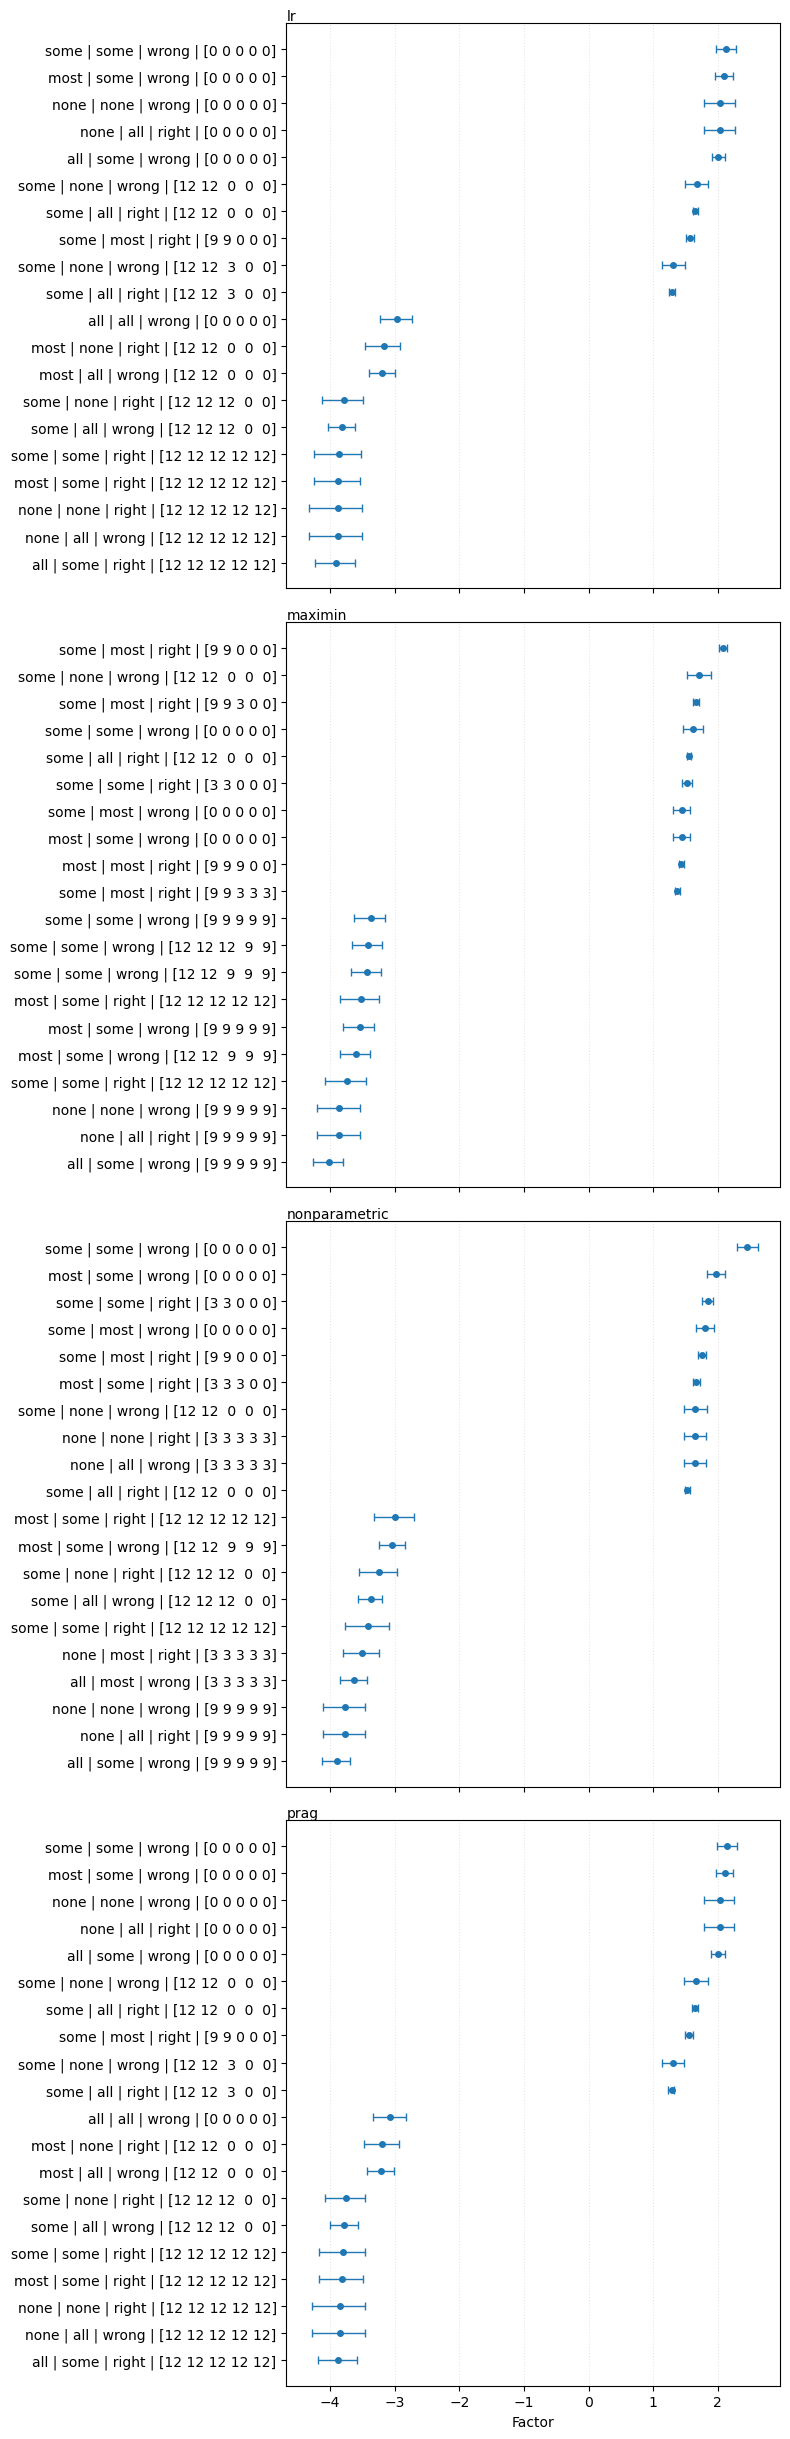

In [79]:
df_top = (
    dataframe
      .groupby("model", group_keys=False)
      .apply(
          lambda g: pd.concat(
              [g.nlargest(10, "factor"),   # 10 highest
               g.nsmallest(10, "factor")]  # 10 lowest
          )
      )
      .reset_index(drop=True)
)

df_top["label"] = (
    df_top[["Q", "A1", "A2", "observation"]]
      .astype(str)                    # ensure everything is str
      .agg(" | ".join, axis=1)        # e.g.  prag | all | some | right | [12,12…]
)


# ------------------------------------------------------------------
# 1.  Prepare the figure: one axis per model, shared x‑scale
# ------------------------------------------------------------------
models = df_top["model"].unique()
n_models = len(models)

fig, axes = plt.subplots(
    nrows=n_models,
    sharex=True,           # comparable x‑axis across panels
    figsize=(8, 0.3*20*n_models + 1)   # 0.3 in height per row
)

# If there is only one model, axes is not a list by default
if n_models == 1:
    axes = [axes]

# ------------------------------------------------------------------
# 2.  Draw each panel
# ------------------------------------------------------------------
for ax, model in zip(axes, models):
    sub = (df_top[df_top["model"] == model]
             .sort_values("factor", ascending=False)
             .reset_index(drop=True))
    
    # Error‑bar (forest) plot
    ax.errorbar(
        x=sub["factor"],
        y=range(len(sub)),
        xerr=[
            sub["factor"] - sub["factor_ci_low"],
            sub["factor_ci_high"] - sub["factor"],
        ],
        fmt="o",
        elinewidth=1,
        capsize=3,
        markersize=4,
    )

    # Aesthetics for this axis
    ax.set_yticks(range(len(sub)))
    ax.set_yticklabels(sub["label"])
    ax.invert_yaxis()                 # largest at the top
    ax.set_title(model, loc="left", pad=2, fontsize=10)
    ax.grid(axis="x", linestyle=":", alpha=.3)

# ------------------------------------------------------------------
# 3.  Common x‑axis label & layout
# ------------------------------------------------------------------
axes[-1].set_xlabel("Factor")
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [80]:
dataframe.to_json('./analysis_values/most_discriminative_stimuli_for_listener_exp_high_fulldata.json')
df_top.to_json('./analysis_values/most_discriminative_stimuli_for_listener_exp_high.json')